# Analyze Eye Gaze Data

In [35]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle
from statsmodels.robust.scale import mad
from utils import *

from eye_gaze_analysis import *

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
user_info_df = pd.read_csv('adhd_eye_movement_data/user_info.csv')
user_info_df.iloc[a.index[a['Subject'] == 3][0]]['Group']

'off-ADHD'

In [37]:
user_info_df

,Subject,Age,Group
0,1,10,off-ADHD
1,2,9,off-ADHD
2,3,9,off-ADHD
3,4,12,off-ADHD
4,5,10,off-ADHD
...,...,...,...
62,46,12,Ctrl
63,47,11,Ctrl
64,48,12,Ctrl
65,49,9,Ctrl


# Data Preprocessing

## Heuristic Spike Filter + Signal Loss + Noise Reduction

In [43]:
def classifySubjectN(n):
    # Input: subject number
    # Output: EyegazeClassifier call output on preprocessed data for specified trial number
    subject_raw_data = load_raw_data(n)
    #subject_trials = np.concatenate(extract_trials(subject_raw_data)[:, [2,3]])

    # Eye Gaze Analysis Preprocessing
    clf = EyegazeClassifier(px2deg=deg_per_pixel(50.8, 60, 1920))
    subject_data = {'x': subject_raw_data['Position_1'].to_numpy(), 'y': subject_raw_data['Position_2'].to_numpy()}
    events = clf(clf.preproc(subject_data), classify_isp=False)
    return events

def congregateSubjectDataN(n):
    # Input: Subject Number
    # Output: Summary data for all trials
    res = []
    for i in range(160):
        # Assumption of 160 trials! Must change if number changes
        res.append(classifySubjectN(n, i))
    return res

def congregateSpecific(n, field):
    res = []
    for i in range(160):
        res.append([d for d in classifySubjectN(n, i) if d['label'] == field][0])
    return res

def congregateSpecificMeasurement(n, field, measurement):
    res = []
    for i in range(160):
        intermediate = [d for d in classifySubjectN(n, i) if d['label'] == field]
        if not len(intermediate):
            # This behavior skips trials where field of interest is not produced for example 'SACC' is not available
            continue
        dictionary = intermediate[0]
        res.append(dictionary[measurement])
    return res

In [44]:
#res = []
for i in user_info_df['Subject']:
    store_pickle(classifySubjectN(i), "events_data/subject_{}_events.pkl".format(i))
    #res.append(classifySubjectN(i))
    
#res

Computed velocity exceeds threshold. Inappropriate filter setup? [1348.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1015.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1229.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1565.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1088.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1090.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1389.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1582.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1767.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1373.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1172.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_1_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1269.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2253.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1940.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1631.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1307.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1284.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1603.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1926.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2244.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1266.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2382.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_2_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1078.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1186.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1253.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1283.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1275.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1248.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1160.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1032.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1014.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1185.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1378.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_3_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [2458.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3183.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2376.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3423.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [5708.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [7580.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1229.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1084.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1381.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1286.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1336.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_4_events.pkl
Stored data in: events_data/subject_5_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1346.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2236.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2948.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3524.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3979.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4268.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4395.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4320.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4077.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3670.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3087.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_6_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1077.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1338.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1582.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1872.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2164.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2399.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2450.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2355.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2179.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1925.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1615.2 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_7_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1284.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1689.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1146.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2285.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3209.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [6806.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [5565.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1097.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1427.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1865.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2222.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_8_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1017.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1180.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1408.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1636.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1012.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1077.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1153.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1099.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1072.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1093.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1027.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_9_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1688.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1347.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1221.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2243.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3091.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3762.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4258.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4576.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4719.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4685.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4476.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_10_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1016.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1114.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1331.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1552.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1610.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1635.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1683.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1727.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1679.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1523.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1155.9 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_11_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1599.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2590.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2237.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1376.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1364.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1313.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1215.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1062.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1783.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2221.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2332.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_12_events.pkl


/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Stored data in: events_data/subject_13_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1763.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1478.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1530.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1733.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1629.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1255.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1132.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1231.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1283.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1292.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1248.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_14_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1055.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1338.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1009.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1011.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1006.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1062.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1101.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1109.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1083.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1032.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1002.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_15_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1014.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1191.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1291.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1281.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1262.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1109.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1056.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1015.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1126.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1020.0 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_16_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1054.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1141.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1182.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1176.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1115.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1029.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1010.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1166.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1061.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1082.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1224.7 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_17_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1018.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1037.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1050.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1048.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1033.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1008.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1541.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1379.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1012.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1100.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_18_events.pkl
Stored data in: events_data/subject_19_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1061.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1116.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1006.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1164.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1367.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1532.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1624.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1703.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1691.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1606.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1434.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_20_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1054.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1196.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1290.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1251.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1333.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1519.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1213.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1160.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1283.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1318.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1240.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_21_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1445.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1666.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1009.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1306.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1605.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2790.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2384.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1978.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1570.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1133.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1362.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_22_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1020.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1044.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1021.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1010.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1008.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1070.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1056.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1132.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1061.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_23_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1511.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1252.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1332.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1804.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2276.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2746.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3215.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2008.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1532.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1089.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1159.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_24_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1123.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1242.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1316.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1342.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1313.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1234.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1100.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1713.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2647.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1231.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2770.2 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_25_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1154.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1158.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1290.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1385.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1450.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1360.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1179.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1757.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1017.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1160.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1299.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_26_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1261.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1340.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1215.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1224.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1182.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1078.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1019.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1043.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1033.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1091.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_27_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1015.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1119.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1173.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1174.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1124.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1022.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1338.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1790.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2227.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2635.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3025.0 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_28_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1348.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1015.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1229.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1565.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1088.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1090.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1389.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1582.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1767.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1373.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1172.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_1_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1269.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2253.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1940.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1631.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1307.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1284.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1603.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1926.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2244.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1266.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2382.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_2_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [2458.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3183.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2376.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3423.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [5708.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [7580.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1229.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1084.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1381.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1286.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1336.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_4_events.pkl
Stored data in: events_data/subject_5_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1017.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1180.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1408.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1636.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1012.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1077.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1153.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1099.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1072.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1093.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1027.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_9_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1016.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1114.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1331.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1552.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1610.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1635.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1683.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1727.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1679.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1523.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1155.9 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_11_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1599.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2590.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2237.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1376.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1364.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1313.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1215.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1062.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1783.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2221.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2332.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_12_events.pkl


/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Stored data in: events_data/subject_13_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1014.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1191.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1291.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1281.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1262.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1109.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1056.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1015.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1126.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1020.0 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_16_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1054.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1141.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1182.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1176.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1115.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1029.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1010.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1166.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1061.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1082.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1224.7 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_17_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1018.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1037.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1050.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1048.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1033.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1008.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1541.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1379.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1012.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1100.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_18_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1061.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1116.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1006.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1164.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1367.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1532.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1624.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1703.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1691.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1606.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1434.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_20_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1054.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1196.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1290.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1251.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1333.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1519.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1213.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1160.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1283.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1318.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1240.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_21_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1445.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1666.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1009.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1306.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1605.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2790.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2384.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1978.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1570.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1133.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1362.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_22_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1511.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1252.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1332.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1804.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2276.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2746.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3215.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2008.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1532.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1089.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1159.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_24_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1123.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1242.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1316.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1342.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1313.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1234.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1100.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1713.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2647.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1231.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2770.2 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_25_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1015.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1119.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1173.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1174.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1124.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1022.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1338.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1790.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2227.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2635.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3025.0 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_28_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1116.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1006.9 > 1000.0 deg/s]


Stored data in: events_data/subject_29_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1662.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2155.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1583.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2076.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1539.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2068.7 > 1000.0 deg/s]


Stored data in: events_data/subject_30_events.pkl
Stored data in: events_data/subject_31_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1030.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1030.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1027.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1124.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1166.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1160.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1093.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1230.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1676.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1655.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1861.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_32_events.pkl
Stored data in: events_data/subject_33_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1029.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1171.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1193.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1108.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1230.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1918.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2268.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1194.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1466.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1657.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1778.3 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_34_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1008.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1074.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1136.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1150.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1227.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2061.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2392.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3392.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3718.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2816.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_35_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1087.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1225.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1286.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1325.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1309.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1245.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1015.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1056.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1061.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1059.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1036.8 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_36_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1320.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1291.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3263.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1187.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1102.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1042.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1258.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1839.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2457.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1816.4 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_37_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [2917.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1106.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1880.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1261.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1502.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2042.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [5787.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [5114.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4423.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3716.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2994.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_38_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1421.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1676.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1195.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1091.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1228.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1339.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1433.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1500.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1052.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1102.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1133.9 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_39_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1116.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1529.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1950.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1222.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1628.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1019.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1077.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1094.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1018.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1134.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_40_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1222.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1190.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1119.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1007.2 > 1000.0 deg/s]


Stored data in: events_data/subject_41_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1018.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1022.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1089.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1957.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1723.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1480.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1222.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1118.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1396.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1680.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1964.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_42_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1217.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1163.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1183.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1136.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1050.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1072.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1053.3 > 1000.0 deg/s]


Stored data in: events_data/subject_43_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1074.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1270.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1490.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1632.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1707.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1718.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1680.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1599.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1505.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1411.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1307.5 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_44_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1246.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1242.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1258.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1254.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1250.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1257.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1235.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1227.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1239.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1246.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1242.0 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_45_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1048.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1459.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1831.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1017.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1111.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1163.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1176.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1052.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1159.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1197.5 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1206.2 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_46_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [2517.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3328.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2148.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1330.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2477.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1719.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2304.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2961.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3684.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [4342.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [3095.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_47_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1049.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1003.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1020.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1003.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1010.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1028.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1128.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1185.9 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1213.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1392.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1384.6 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_48_events.pkl


/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/williamdas/opt/anaconda3/envs/python39_ml/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Stored data in: events_data/subject_49_events.pkl


Computed velocity exceeds threshold. Inappropriate filter setup? [1015.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1038.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1054.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1033.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1575.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1190.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1044.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1051.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1325.6 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1554.2 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1400.1 > 1000.0 deg/s]
Computed velocity exc

Stored data in: events_data/subject_50_events.pkl


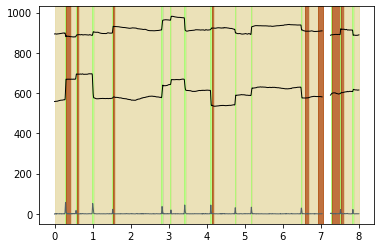

In [40]:
clf.show_gaze(pp=clf.preproc(data), events=events)

In [ ]:
filtered_x = heuristic_spike_filter(raw_x)
plt.plot(filtered_x)

In [ ]:
filtered_y = heuristic_spike_filter(raw_y)
plt.plot(filtered_y)

In [ ]:
# Euclidean distance
# Input: (x1, y1), (x2, y2)
def euclidean_dist(point1, point2):
    return np.sqrt(np.square(point1[0] - point2[0]) + np.square(point1[1] - point2[1]))

# Point-to-point velocity
# Input: (x1, y1), (x2, y2)
def ptp_velocity(point1, point2, t1, t2):
    return euclidean_dist(point1, point2) / (t2 - t1)

# Point-to-point velocities for a given interval
# Input: df 
def ptp_velocities(data):
    velocities = []
    for idx, row in data.iterrows():
        if idx + 1 < len(data):
            pass

print(euclidean_dist(5, 0, 100, 0))
print(ptp_velocity(5, 0, 100, 0, 5, 10))

# Scanpath Analysis

In [ ]:
plt.plot(test['Position_1'], test['Position_2'])

In [ ]:
plt.plot(fetch_data(45)['Position_1'], fetch_data(45)['Position_2'])

In [ ]:
test.where(test['Events'])